In [25]:
# Exercițiu laborator 3

In [26]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

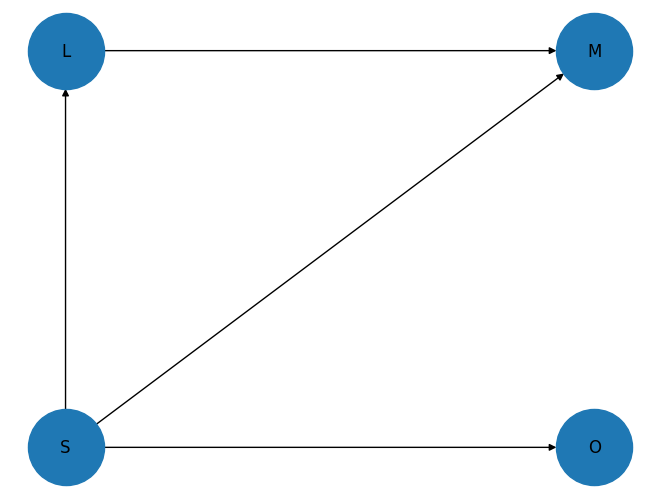

In [27]:
model = BayesianNetwork([('S', 'O'), ('S', 'L'), ('S', 'M'),('L', 'M')])

coords = {'S': (0, 0), 'O': (1, 0), 'L': (0, 1), 'M': (1, 1)}
nx.draw(model, pos=coords, with_labels=True, node_size=3000)

Se observa ca S este independent, caci nu are nici un nod parinte de care sa depinda

In [28]:
CPD_S = TabularCPD(variable='S',
                   variable_card=2,
                   values=[[0.6], [0.4]])
print(CPD_S)

+------+-----+
| S(0) | 0.6 |
+------+-----+
| S(1) | 0.4 |
+------+-----+


In [29]:
CBD_O = TabularCPD(variable='O',
                   variable_card=2,
                   values=[[0.9, 0.3],
                           [0.1, 0.7]],
                   evidence=['S'],
                   evidence_card=[2])
print(CBD_O)

+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| O(0) | 0.9  | 0.3  |
+------+------+------+
| O(1) | 0.1  | 0.7  |
+------+------+------+


In [30]:
CBD_L = TabularCPD(variable='L',
                     variable_card=2,
                     values=[[0.7, 0.2],
                            [0.3, 0.8]],
                     evidence=['S'],
                     evidence_card=[2])
print(CBD_L)

+------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| L(0) | 0.7  | 0.2  |
+------+------+------+
| L(1) | 0.3  | 0.8  |
+------+------+------+


In [31]:
CBD_M = TabularCPD(variable='M',
                   variable_card=2,
                   evidence=['S','L'],
                   evidence_card=[2,2],
                   values=[[0.8, 0.4, 0.5, 0.1],
                           [0.2, 0.6, 0.5, 0.9]])
print(CBD_M)

+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| L    | L(0) | L(1) | L(0) | L(1) |
+------+------+------+------+------+
| M(0) | 0.8  | 0.4  | 0.5  | 0.1  |
+------+------+------+------+------+
| M(1) | 0.2  | 0.6  | 0.5  | 0.9  |
+------+------+------+------+------+


In [32]:
model.add_cpds(CPD_S, CBD_O, CBD_L, CBD_M)
assert model.check_model()

Clasificarea lui S în funcție de O, L și M

In [43]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

for i in ['O', 'L', 'M']:
    print(f"Probabilitatea lui S dat fiind {i}")
    print(f"{i}=0")
    print(infer.query(variables=['S'], evidence={i: 0}))
    print(f"{i}=1")
    print(infer.query(variables=['S'], evidence={i: 1}))

Probabilitatea lui S dat fiind O
O=0
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8182 |
+------+----------+
| S(1) |   0.1818 |
+------+----------+
O=1
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.1765 |
+------+----------+
| S(1) |   0.8235 |
+------+----------+
Probabilitatea lui S dat fiind L
L=0
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8400 |
+------+----------+
| S(1) |   0.1600 |
+------+----------+
L=1
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.3600 |
+------+----------+
| S(1) |   0.6400 |
+------+----------+
Probabilitatea lui S dat fiind M
M=0
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8500 |
+------+----------+
| S(1) |   0.1500 |
+------+----------+
M=1
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.3692 |
+------+----------+
| S(1) |   0.6308 |
+------+----------+
